In [742]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline



In [743]:
##import cases by zip code data
zip_df = pd.read_csv('COVID_CountByZipPerDate 03292021.csv')
zip_df.rename(columns = {'Specimen Collection Date':'pos_test_date','Zip':'zipcode' ,'Cases':'cases'}, inplace = True)

In [744]:
zip_df.head()

,pos_test_date,zipcode,cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1


In [745]:
zip_df

,pos_test_date,zipcode,cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1
...,...,...,...
8827,3/27/2021,37210.0,1
8828,3/27/2021,37211.0,1
8829,3/27/2021,37212.0,1
8830,3/27/2021,37214.0,2


In [746]:
zip_df.tail()
zip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pos_test_date  8832 non-null   object 
 1   zipcode        8456 non-null   float64
 2   cases          8832 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 207.1+ KB


In [747]:
##import vaccine data
vax = pd.read_csv('vaccine_with_protocol.csv')

In [754]:
vax.head()

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


In [767]:
vax_filter = vax[vax.dose_nbr == 1.0]
vax_filter

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot
5,2020-12-17,37013.0,16.0,1.0,two-shot
...,...,...,...,...,...
6686,2021-04-07,37221.0,81.0,1.0,two-shot
6687,2021-04-07,37221.0,2.0,1.0,one-shot
6689,2021-04-07,37228.0,9.0,1.0,two-shot
6691,2021-04-07,NaN,8.0,1.0,two-shot


In [769]:
vax_filter.shape

(3967, 5)

In [770]:
## most vaccines given by county
most_vax_given = vax_filter.groupby('zipcode')['count_given'].sum()
most_vax_df = pd.DataFrame(most_vax_given).reset_index()
most_vax_df.columns = ['zipcode', 'total_vaccines_given']
print(most_vax_df)


    zipcode  total_vaccines_given
0   37013.0               18465.0
1   37027.0                 352.0
2   37069.0                  50.0
3   37072.0                8460.0
4   37076.0               11113.0
5   37080.0                1970.0
6   37115.0                8520.0
7   37138.0                7152.0
8   37189.0                1056.0
9   37201.0                 576.0
10  37203.0                8029.0
11  37204.0                6410.0
12  37205.0               14666.0
13  37206.0               10124.0
14  37207.0                9255.0
15  37208.0                5526.0
16  37209.0               13600.0
17  37210.0                3747.0
18  37211.0               19175.0
19  37212.0                7160.0
20  37213.0                  72.0
21  37214.0                9198.0
22  37215.0               12132.0
23  37216.0                7230.0
24  37217.0                5837.0
25  37218.0                4391.0
26  37219.0                 638.0
27  37220.0                3239.0
28  37221.0   

In [722]:
## top 5 vaccines given by county
vax_5 = most_vax_df.nlargest(5, ['total_vaccines_given'])
vax_5['zipcode'] = vax_5.zipcode.astype('int64', errors = "ignore")
vax_5['zipcode'] = vax_5.zipcode.astype('category', errors = "ignore")






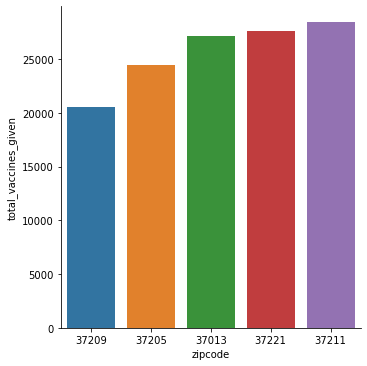

In [723]:
##plot most (top5) vaccines given by zipcode -- add county names to zip?? 
givenvax_top5 = sns.catplot(x="zipcode", y="total_vaccines_given", kind="bar", data=vax_5, order=vax_5.sort_values('total_vaccines_given').zipcode)

<AxesSubplot:xlabel='zipcode'>

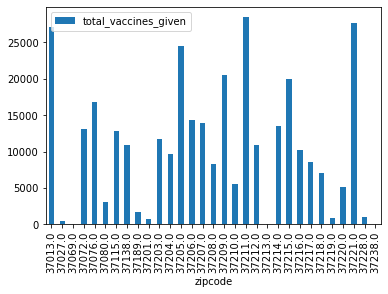

In [724]:
##most vax given of all zipcodes
most_vax_df.plot.bar('zipcode', 'total_vaccines_given')

In [771]:
## most cases by zipcode
most_cases = zip_df.groupby('zipcode')['cases'].sum()
most_cases_df = pd.DataFrame(most_cases).reset_index()
most_cases_df.columns = ['zipcode', 'cases']
print(most_cases_df)

    zipcode  cases
0   37013.0  13354
1   37027.0    231
2   37069.0     16
3   37072.0   2984
4   37076.0   4279
5   37080.0    574
6   37115.0   4574
7   37138.0   2359
8   37189.0    479
9   37201.0    299
10  37203.0   3346
11  37204.0   1786
12  37205.0   2566
13  37206.0   3112
14  37207.0   4729
15  37208.0   2428
16  37209.0   5072
17  37210.0   2100
18  37211.0  10233
19  37212.0   1823
20  37213.0     65
21  37214.0   3508
22  37215.0   2438
23  37216.0   2011
24  37217.0   3907
25  37218.0   1785
26  37219.0    270
27  37220.0    656
28  37221.0   3910
29  37228.0    310
30  37238.0      3


In [726]:
##plot most positive cases by zip code
top5_cases = most_cases_df.nlargest(5, ['cases'])
top5_cases['zipcode'] = top5_cases.zipcode.astype('int64', errors = "ignore")
top5_cases['zipcode'] = top5_cases.zipcode.astype('category', errors = "ignore")

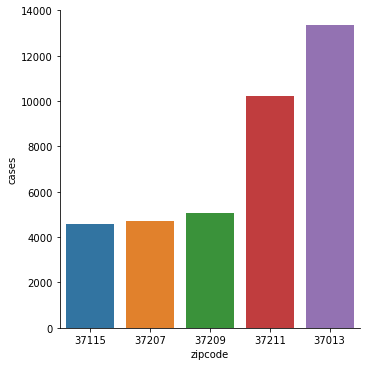

In [727]:
##plot most cases (top5) by zipcode
cases_top5 = sns.catplot(x="zipcode", y="cases", kind="bar", data=top5_cases, order=top5_cases.sort_values('cases').zipcode)

<AxesSubplot:xlabel='zipcode'>

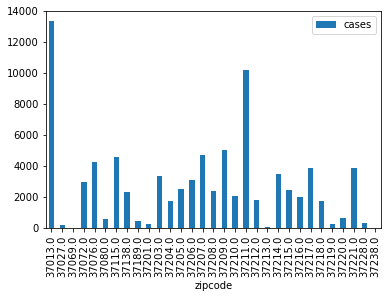

In [728]:
##most cases given of all zipcodes
most_cases_df.plot.bar('zipcode', 'cases')

Text(0, 0.5, 'Most Vaccines Given')

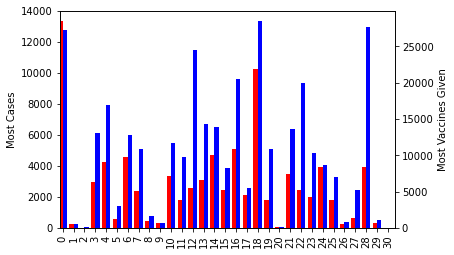

In [729]:
#plot most cases and most vax given side by side.
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = .4

most_cases_df.cases.plot(kind='bar', color='red', ax=ax, width=width, position=1)
most_vax_df.total_vaccines_given.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Most Cases')
ax2.set_ylabel('Most Vaccines Given')

zipcode 37013 (Antioch) was ranked 3rd in most vaccines given, but dominated in total number of cases 

In [772]:
##import income data from 2019
income = pd.read_csv('income_clean.csv', usecols=[0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
income.head()

## ANDREWS WAY TO IMPORT, CLEAN, TRANSPOSE ETC
##income_data = pd.read_excel("data/household_income.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
#income_data = income_data[income_data.columns.drop(list(income_data.filter(regex='Error')))]
#income_data.columns = income_data.columns.droplevel(1)
#income_clean = income_data.set_index('Unnamed: 0_level_0').T.reset_index().rename({"index": "zipcode"}, axis = 1)


,zipcode,"less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","more than $200,000"
0,37013,1424,1023,1197,1751,1647,1685,1748,1937,1748,3956,4510,5507,3547,1703,1212,1002
1,37015,421,256,115,415,365,452,350,277,323,719,903,903,639,294,157,84
2,37027,460,173,246,250,254,250,316,538,472,597,1235,1861,2167,1688,2837,6606
3,37062,119,122,138,140,123,124,121,216,140,329,569,645,468,342,286,158
4,37064,771,302,623,512,609,630,721,495,567,1479,1784,2293,2338,2265,2394,3857


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   zipcode               39 non-null     int64
 1   less than $10,000     39 non-null     int64
 2   $10,000 to $14,999    39 non-null     int64
 3   $15,000 to $19,999    39 non-null     int64
 4   $20,000 to $24,999    39 non-null     int64
 5   $25,000 to $29,999    39 non-null     int64
 6   $30,000 to $34,999    39 non-null     int64
 7   $35,000 to $39,999    39 non-null     int64
 8   $40,000 to $44,999    39 non-null     int64
 9   $45,000 to $49,999    39 non-null     int64
 10  $50,000 to $59,999    39 non-null     int64
 11  $60,000 to $74,999    39 non-null     int64
 12  $75,000 to $99,999    39 non-null     int64
 13  $100,000 to $124,999  39 non-null     int64
 14  $125,000 to $149,999  39 non-null     int64
 15  $150,000 to $199,999  39 non-null     int64
 16   more than

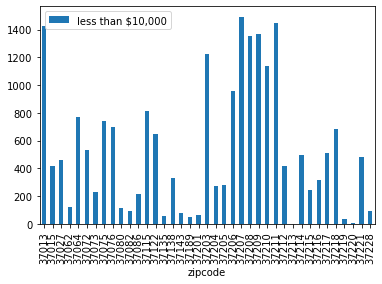

In [773]:
##testing all zip codes who makes >10k
income.plot.bar('zipcode', 'less than $10,000')
income.info()

In [733]:
##merge to try and see income and cases side by side per zip .. 
merge_df = most_vax_df.merge(income, on=["zipcode"], how='left')
merge_df.head()

,zipcode,total_vaccines_given,"less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","more than $200,000"
0,37013.0,27167.0,1424.0,1023.0,1197.0,1751.0,1647.0,1685.0,1748.0,1937.0,1748.0,3956.0,4510.0,5507.0,3547.0,1703.0,1212.0,1002.0
1,37027.0,506.0,460.0,173.0,246.0,250.0,254.0,250.0,316.0,538.0,472.0,597.0,1235.0,1861.0,2167.0,1688.0,2837.0,6606.0
2,37069.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37072.0,13108.0,534.0,412.0,456.0,674.0,687.0,506.0,518.0,568.0,544.0,1095.0,1311.0,2186.0,1120.0,784.0,652.0,486.0
4,37076.0,16855.0,698.0,405.0,626.0,496.0,946.0,740.0,912.0,662.0,918.0,1445.0,2146.0,2648.0,1709.0,1167.0,1193.0,678.0


In [734]:
low_income = pd.DataFrame(merge_df, columns = ['less than $10,000', '$10,000 to $14,999','$20,000 to $24,999', '$25,000 to $29,999'])
mid_income = pd.DataFrame(merge_df, columns = ['$30,000 to $34,999', '$35,000 to $39,999', '$40,000 to $44,999', '$45,000 to $49,999', '$50,000 to $59,999', '$60,000 to $74,999'])
high_income = pd.DataFrame(merge_df, columns = ['$75,000 to $99,999','$100,000 to $124,999', '$125,000 to $149,999', '$150,000 to $199,999', 'more than $200,000'])



<AxesSubplot:xlabel='zipcode'>

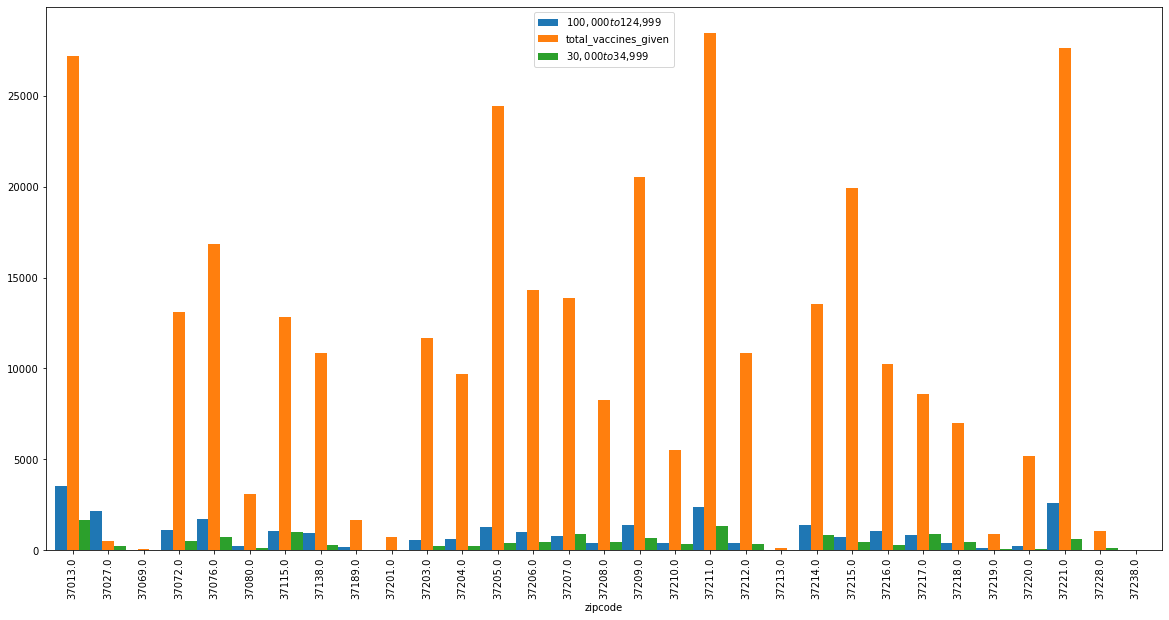

In [735]:
#stacking cases on top of particular income brackets

merge_df.plot(x = 'zipcode', y = ['$100,000 to $124,999', 'total_vaccines_given', '$30,000 to $34,999'], kind='bar', width =1, figsize =(20,10))
#example code below of stacking columns 
#df.plot(x="X", y=["A", "B", "C"], kind="bar")

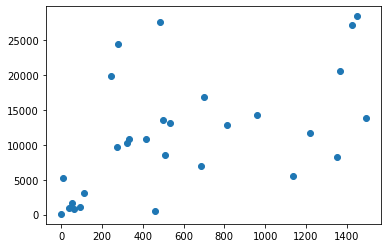

In [736]:
plt.scatter(merge_df['less than $10,000'], merge_df['total_vaccines_given'])


In [739]:
vaccine_filter = vaccine_protocol[vaccine_protocol.dose_nbr == 1.0]
vaccine_filter


NameError: name 'vaccine_protocol' is not defined